# CSCI2000U - Scientific Data Analysis
# Final Project: **NBA Star Predictor**

### **Project Group 16**
* **Hasan Chakaroun** - 100788546
* **.Mohammad** - 100755461
* **Preet Panchal** - 100707094
* **Eihab Syed** - 100707448

### **Dataset Selected:**
- **Name:** NBA Players Data - all_seasons.csv
&nbsp;
- **Source:** https://www.kaggle.com/justinas/nba-players-data
&nbsp;
- **Reference:** Cirtautas, J. (2021, August 2). NBA players. Kaggle. Retrieved November 26, 2021, from https://www.kaggle.com/justinas/nba-players-data. 
&nbsp;
- **Creator:** Justinas Cirtautas, Data Scientist


## **INTRODUCTION**

### The Topic:
The National Basketball Association (NBA) is a professional basketball league in North America. The league is composed of 30 teams and is one of the four major professional sports leagues in the United States and Canada. It is the premier men's professional basketball league in the world. 

The selected dataset, “NBA Players” represents the data of NBA players from 1996-2020. We chose to study the topic of the NBA players because all of us are big fans of the game of basketball. Some of us also had dreams of playing in the NBA, but, here we are pursuing Computer Science. However, we have the amazing opportunity to study something we watch as fans on a daily basis. We are excited to present to you our findings and research about players in the league!

### Descriptive Statistics: 
1) Does the player's weight affect their performance? 
2) Does the player's height affect their performance?

### Questions of Study: 
3) Who is the longest active player in the league? 
4) Calculate the percentage of players that were undrafted. 
    * To see how many and what players were talented enough to directly sign with an NBA team instead of being drafted.
5) What is the average age of the players by season?
6) Determine the position of each player (since it's not provided in the dataset). 
    * To find the average height per position.
7) Find the top 5 colleges. 
    * To see which colleges most players played for before coming to the NBA.
8) Display the countries where players are from for each season. 
    * To see which countries players are coming from the most.
9) Find the player with the most points, rebounds, and assists, respectively, of all-time.
10) Compare first-round, number-one player picks from each draft year.
    * To find out whether there were any NBA busts from the draft. 
11) All-Star players from each unique country? (All-Star player defined as pts: 25+, reb: 7+, ast: 7+). 

### Contribution per Team Member: 
* Hasan Chakaroun: Introduction, Description of Data & Analysis of Data
* .Mohammad: Introduction, Description of Data & Analysis of Data
* Preet Panchal: Exploratory Data Analysis, Potential Data Science & Conclusion
* Eihab Syed: Exploratory Data Analysis, Potential Data Science & Conclusion



## **DESCRIPTION OF DATASET**

### The Dataset: 
The selected dataset contains over two decades of statistics referencing each player that was part of the NBA from 1996-2020. The data set contains over two decades of data on each player who has been part of an NBA teams' roster. It captures demographic variables such as age, height, weight and place of birth, biographical details like the team played for, draft year and round. In addition, it has basic box score statistics such as games played, average number of points, rebounds, assists, etc. In collection, the data set has 11700 rows and 22 columns each holding vast amounts of information pertaining to the NBA. 

### The Access: 
These statistics were sourced from the official NBA website in addition to Kaggle from Justinas Cirtautas (https://www.kaggle.com/justinas/nba-players-data). Justinas extracted this raw data from https://www.basketball-reference.com/ and then he further sorted it into the 22 following attributes below. 

### The Attributes: 
There are the 22 attributes/columns in this dataset:

* index                - Player index / Row number
* player_name          - Name of player
* team_abbreviation    - Abbreviated name of the team the player played for
* age                  - Age of player
* player_height        - Height of the player (cm)
* player_weight        - Weight of the player (kg)
* college              - Name of the college player attended
* country              - Name of the country player was born in
* draft_year           - The year the player was drafted
* draft_round          - The draft round the player was picked
* draft_number         - The draft number at which the player was picked in his draft round
* gp                   - Games played throughout the season
* pts                  - Average number of points scored
* reb                  - Average number of rebounds grabbed
* ast                  - Average number of assists distributed
* net_rating           - Team’s point differential/100 possessions while player is on court
* oreb_pct             - % of available offensive rebounds the player grabbed on court
* dreb_pct             - % of available defensive rebounds the player grabbed on court
* usg_pct              - % of team plays used by the player while on court
* ts_pct               - Measure of player’s shooting efficiency
* ast_pct              - % of teammate field goals the player assisted on court
* season               - NBA season

## **ANALYSIS OF DATASET**

### The Data Quality: 
The analysis of data refers to the process of manipulating raw data to uncover useful insights and draw conclusions. During this process, a data analyst or data scientist will organize, transform, and model a dataset. In order to use the data from the dataset some cleaning has to be done. For example, in our dataset we have a “None” value under the “college” column which means that the player did not attend college or get drafted straight out of college into the NBA. As a reader, it was very difficult to comprehend such values in specific columns, thus we decided to change these values to make it more clear to our audience reading our report analysis on NBA players. Based on the dataset we selected, we thought that the data quality was not up to par, but it was not on the bad end either. As a group, we decided to clean a total of 12 columns. Some columns required changes in the value and some needed the type of the value changed (ie. from string to integer). This is to make it more efficient and simple to access particular values in columns when manipulating and exploring the dataset. Furthermore we also removed an additional index column as the pandas library automatically adds an index to the dataframe. 

In [2]:
# importing used libraries
import csv
import re
import pandas as pd
from functools import reduce
import numpy as np
import calendar
import string
import matplotlib.pyplot as plt
from datetime import datetime as dt

# importing seaborn
import sys
!{sys.executable} -m pip install seaborn
import seaborn as sns

# this aux function reads the CSV file and returns the data in a Python dictionary
def get_data_csv():
    collection = []
    with open('all_seasons.csv', 'r') as f:
        for line in csv.DictReader(f):
            collection.append(line)
        return collection
        
# the data    
data = get_data_csv()
# the dataframe
df = pd.DataFrame(data) 
df

,,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Travis Knight,LAL,22.0,213.36,106.59411999999999,Connecticut,USA,1996,1,...,4.8,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052000000000000005,1996-97
1,1,Matt Fish,MIA,27.0,210.82,106.59411999999999,North Carolina-Wilmington,USA,1992,2,...,0.3,0.8,0.0,-15.1,0.14300000000000002,0.267,0.265,0.33299999999999996,0.0,1996-97
2,2,Matt Bullard,HOU,30.0,208.28,106.59411999999999,Iowa,USA,Undrafted,Undrafted,...,4.5,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099,1996-97
3,3,Marty Conlon,BOS,29.0,210.82,111.13004,Providence,USA,Undrafted,Undrafted,...,7.8,4.4,1.4,-9.0,0.083,0.152,0.16699999999999998,0.542,0.10099999999999999,1996-97
4,4,Martin Muursepp,DAL,22.0,205.74,106.59411999999999,None,USA,1996,1,...,3.7,1.6,0.5,-14.5,0.109,0.11800000000000001,0.233,0.48200000000000004,0.114,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11695,11695,Matthew Dellavedova,CLE,30.0,190.5,90.7184,St.Mary's College of California,Australia,Undrafted,Undrafted,...,2.8,1.8,4.5,-3.1,0.028999999999999998,0.085,0.125,0.312,0.337,2020-21
11696,11696,Maurice Harkless,SAC,28.0,200.66,99.79024,St. John's,USA,2012,1,...,5.2,2.4,1.2,-2.9,0.017,0.09699999999999999,0.114,0.527,0.071,2020-21
11697,11697,Max Strus,MIA,25.0,195.58,97.52228000000001,DePaul,USA,Undrafted,Undrafted,...,6.1,1.1,0.6,-4.2,0.011000000000000001,0.073,0.179,0.597,0.07400000000000001,2020-21
11698,11698,Marcus Morris Sr.,LAC,31.0,203.2,98.88305600000001,Kansas,USA,2011,1,...,13.4,4.1,1.0,4.2,0.025,0.133,0.19399999999999998,0.614,0.055999999999999994,2020-21


### Data Cleaning:
We made the following changes: 
* Changed values in college from “None” to “No college” to easily identify that a player did not attend a college before playing in the NBA.
* Converted attributes “player_height”, “player_weight”, “pts”, “ats”, “reb”, “oreb_pct”, “dreb_pct”, “net_rating”, “ts_pct” to floats in order perform  operations to be done more efficiently. 
* Converted attributes such as “age”, “gp” to integer in order to perform operations to be done more efficiently. 
* Had to drop a duplicate index that carried over from the csv file.


In [3]:
# removing additional placeholder/column for index
df.drop(columns=[''], inplace=True)
df['college'] = df['college'].replace(['None'],'No College')
df['player_height'] = df['player_height'].astype(float)
df['player_weight'] = df['player_weight'].astype(float)
df['age'] = df['age'].astype(float).astype(int)
df['pts'] = df['pts'].astype(float)
df['reb'] = df['reb'].astype(float)
df['ast'] = df['ast'].astype(float)
df['gp'] = df['gp'].astype(float).astype(int)
df['oreb_pct'] = df['oreb_pct'].astype(float)
df['dreb_pct'] = df['dreb_pct'].astype(float)
df['net_rating'] = df['net_rating'].astype(float)
df['ts_pct'] = df['ts_pct'].astype(float)
df[:5]

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Travis Knight,LAL,22,213.36,106.59412,Connecticut,USA,1996,1,29,...,4.8,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052000000000000005,1996-97
1,Matt Fish,MIA,27,210.82,106.59412,North Carolina-Wilmington,USA,1992,2,50,...,0.3,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.0,1996-97
2,Matt Bullard,HOU,30,208.28,106.59412,Iowa,USA,Undrafted,Undrafted,Undrafted,...,4.5,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099,1996-97
3,Marty Conlon,BOS,29,210.82,111.13004,Providence,USA,Undrafted,Undrafted,Undrafted,...,7.8,4.4,1.4,-9.0,0.083,0.152,0.16699999999999998,0.542,0.10099999999999999,1996-97
4,Martin Muursepp,DAL,22,205.74,106.59412,No College,USA,1996,1,25,...,3.7,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114,1996-97


### Code & Analysis of Basic Characteristics of Dataset:


In [4]:
# displaying the total number of data using string and len inbuilt python function
print("There are " + str(len(data)) + " data records in all_seasons.csv. ")

There are 11700 data records in all_seasons.csv. 


In [5]:
print("Q2) Here are the top 5 data records: ")
print(data[:3]) # using indexing to display the first 3 records

Q2) Here are the top 5 data records: 
[{'': '0', 'player_name': 'Travis Knight', 'team_abbreviation': 'LAL', 'age': '22.0', 'player_height': '213.36', 'player_weight': '106.59411999999999', 'college': 'Connecticut', 'country': 'USA', 'draft_year': '1996', 'draft_round': '1', 'draft_number': '29', 'gp': '71', 'pts': '4.8', 'reb': '4.5', 'ast': '0.5', 'net_rating': '6.2', 'oreb_pct': '0.127', 'dreb_pct': '0.182', 'usg_pct': '0.142', 'ts_pct': '0.536', 'ast_pct': '0.052000000000000005', 'season': '1996-97'}, {'': '1', 'player_name': 'Matt Fish', 'team_abbreviation': 'MIA', 'age': '27.0', 'player_height': '210.82', 'player_weight': '106.59411999999999', 'college': 'North Carolina-Wilmington', 'country': 'USA', 'draft_year': '1992', 'draft_round': '2', 'draft_number': '50', 'gp': '6', 'pts': '0.3', 'reb': '0.8', 'ast': '0.0', 'net_rating': '-15.1', 'oreb_pct': '0.14300000000000002', 'dreb_pct': '0.267', 'usg_pct': '0.265', 'ts_pct': '0.33299999999999996', 'ast_pct': '0.0', 'season': '1996-9

In [6]:
# creating a set with all the player names from data to only include each unique team with no repeats
unique_name = {player['player_name'] for player in data}
# then displaying the length of unique_name as a string
print("There are " + str(len(unique_name)) + " unique NBA player names in the dataset. Therefore, there are " + str(len(unique_name)) + " players that played in the National Basketball Association since 1996.\n")
print("Here are the first 100 player names from the unique_name dict. (List was too long to print completely): ")
print(list(unique_name)[:50])

There are 2333 unique NBA player names in the dataset. Therefore, there are 2333 players that played in the National Basketball Association since 1996.

Here are the first 100 player names from the unique_name dict. (List was too long to print completely): 
['Brent Barry', 'Duane Ferrell', 'Alen Smailagic', 'Ky Bowman', 'Alando Tucker', 'Aaron Holiday', 'Ray Owes', 'Blake Griffin', 'Jack Haley', 'Daniel Orton', 'Horace Grant', 'Arron Afflalo', 'Ricky Ledo', 'Archie Goodwin', 'Ray Spalding', 'Quinton Ross', 'Ivan Rabb', 'Loren Meyer', 'Kyle Lowry', 'Noah Vonleh', 'Marc Gasol', 'Hakim Warrick', 'Steve Francis', 'Dennis Schroder', 'Bojan Bogdanovic', 'Tyrus Thomas', 'Kris Dunn', 'Chris Andersen', 'Jonny Flynn', 'Miles Simon', 'Wenyen Gabriel', 'Rik Smits', 'D.J. Kennedy', 'Gerald Wallace', "Kyle O'Quinn", 'Raul Neto', 'Terry Dehere', 'Soumaila Samake', 'Dillon Brooks', 'Ben McLemore', 'Rodney McGruder', 'John Edwards', 'Zoran Dragic', 'Thomas Robinson', 'Todd MacCulloch', 'Tony Snell', 'J

In [7]:
# creating a set with all the teams from data to only include each unique team with no repeats
unique_team = {team['team_abbreviation'] for team in data}
# then displaying the length of unique_team as a string
print("Not all team names in the dataset are unique. There are " + str(len(unique_team)) + " unique NBA teams in the dataset. Therefore, there are " + str(len(unique_team)) + " teams that take part in the National Basketball Association since 1996.")
print(unique_team)

Not all team names in the dataset are unique. There are 36 unique NBA teams in the dataset. Therefore, there are 36 teams that take part in the National Basketball Association since 1996.
{'IND', 'SAC', 'ORL', 'ATL', 'TOR', 'LAC', 'BOS', 'MIL', 'UTA', 'POR', 'GSW', 'WAS', 'HOU', 'NJN', 'PHX', 'MIA', 'CHH', 'DET', 'NOP', 'CHA', 'LAL', 'CLE', 'MEM', 'OKC', 'BKN', 'NOK', 'DAL', 'NYK', 'DEN', 'SEA', 'VAN', 'NOH', 'MIN', 'SAS', 'PHI', 'CHI'}


In [8]:
# creating a set with all the colleges from data to only include each unique college with no repeats
unique_college = {player['college'] for player in data}
# then displaying the length of unique_college as a string
print("Not all college names in the dataset are unique. There are " + str(len(unique_college)) + " unique colleges where the NBA players played before coming to the NBA in the dataset.\n")
print("Here are the first 100 colleges from the unique_college dict. (List was too long to print completely): ")
print(list(unique_college)[:50])

Not all college names in the dataset are unique. There are 336 unique colleges where the NBA players played before coming to the NBA in the dataset.

Here are the first 100 colleges from the unique_college dict. (List was too long to print completely): 
['Virginia Union', 'St. Louis', 'Hartford', 'Utah State', 'California-Santa Barbara', 'Murray State', 'Florida', 'Vermont', 'Northern Arizona', 'Louisiana-Lafayette', 'East Carolina', "St. Mary's (TX)", 'Thomas More', 'McNeese State', 'Colgate', 'Connecticut', 'Virginia Commonwealth', 'S.E. Missouri', 'Rider', 'San Jose State', 'Southeastern Oklahoma State', 'California-Los Angeles', 'Wisconsin', 'Jackson State', 'Southern Methodist', 'Southern Mississippi', 'Bradley', 'Saint Louis', 'Tennessee-Chattanooga', 'Louisiana Tech', 'American University', 'Morehouse', 'Boise State', 'Michigan', 'Detroit Mercy', 'Southern California', 'Massachusetts', 'Hofstra', 'Valparaiso', 'Northwestern', 'Delta State', 'Virginia Tech', 'Southern Illinois', 

In [9]:
# creating a set with all the countries from data to only include each unique country with no repeats
unique_country = {player['country'] for player in data}
# then displaying the length of unique_country as a string
print("Not all country names in the dataset are unique. There are " + str(len(unique_country)) + " unique countries that the NBA players originated from in the dataset.\n")
print(unique_country)

Not all country names in the dataset are unique. There are 79 unique countries that the NBA players originated from in the dataset.

{'Bosnia', 'Georgia', 'Tunisia', 'Czech Republic', 'US Virgin Islands', 'Panama', 'Haiti', 'Cameroon', 'Australia', 'Mexico', 'Ghana', 'Guinea', 'New Zealand', 'Turkey', 'Macedonia', 'Trinidad and Tobago', 'Tanzania', 'Russia', 'Uruguay', 'Senegal', 'Egypt', 'Gabon', 'Montenegro', 'Belize', 'USSR', 'Dominican Republic', 'South Korea', 'Nigeria', 'Yugoslavia', 'Netherlands', 'France', 'Serbia', 'Bosnia & Herzegovina', 'Ukraine', 'Slovenia', 'Italy', 'Spain', 'Angola', 'DRC', 'Sudan', 'Saint Lucia', 'United Kingdom', 'Brazil', 'South Sudan', 'Lithuania', 'Democratic Republic of the Congo', 'Finland', 'Poland', 'Croatia', 'Japan', 'Canada', 'Venezuela', 'Israel', 'Greece', 'Austria', 'China', 'Republic of the Congo', 'Germany', 'Sweden', 'Argentina', 'USA', 'Iran', 'Mali', 'Congo', 'Bahamas', 'Ireland', 'Bosnia and Herzegovina', 'Sudan (UK)', 'Puerto Rico', 

In [10]:
'''
Running the dataRangeFunc() by calling the 'reduce' function to display the range of years. 
'''

# created a reducer function to loop through all the numerical years of the data
def dataRangeFunc(state, player):
    # compute a list of all the years
    if state is None:
        state = {
        'min_year': player['season'].split('-')[0],
        'max_year': player['season'].split('-')[0]
        }
    # continually update the 'min_year' & 'max_year'
    else:
        state['min_year'] = min(state['min_year'], player['season'].split('-')[0])
        state['max_year'] = max(state['max_year'], player['season'].split('-')[0])

    return state

# run the reducer function and output 'min_year' and 'max_year' to display our range
print("Here is the dataset's range of years, in other words, the season range (oldest and newest): ")
reduce(dataRangeFunc, data, None)['min_year'] + " to " + reduce(dataRangeFunc, data, None)['max_year']

Here is the dataset's range of years, in other words, the season range (oldest and newest): 


'1996 to 2020'

### Descriptive Statistics Analysis: 

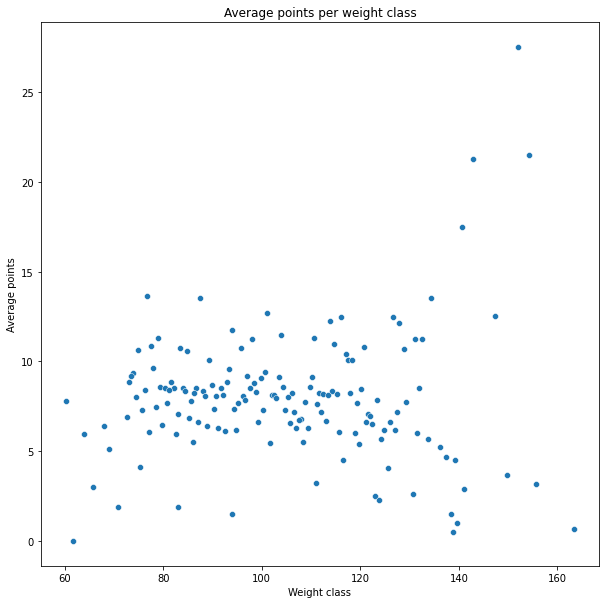

In [11]:
# 1) Does the player's weight affect their performance? 
# Set figure size to by easier to read
plt.figure(figsize=(10,10));
# Gather data by weights of players to create auto generated weight classes
player_weights = df.groupby(["player_weight"]).mean().sort_values(by='pts', ascending=False).reset_index()
# Put data into a scatterplot and set title and x and y labels
player_weights_pts_plot = sns.scatterplot(x="player_weight", y="pts", data=player_weights);
player_weights_pts_plot.set_title('Average points per weight class');
player_weights_pts_plot.set(xlabel="Weight class", ylabel = "Average points");

Does the player's weight affect their performance? 
* From the scatter plot shown we can see a correlation of weight with points, players in the higher ranges of 140-160 kgs seem to have the higher points per game, where most of the players seem to have weights between 80-120 kgs. There does not seem to be a causation relationship but rather a correlation between average points and weight. We chose a scatter plot as it was the best option to easily view this specific data for users as it showed differences in points better.


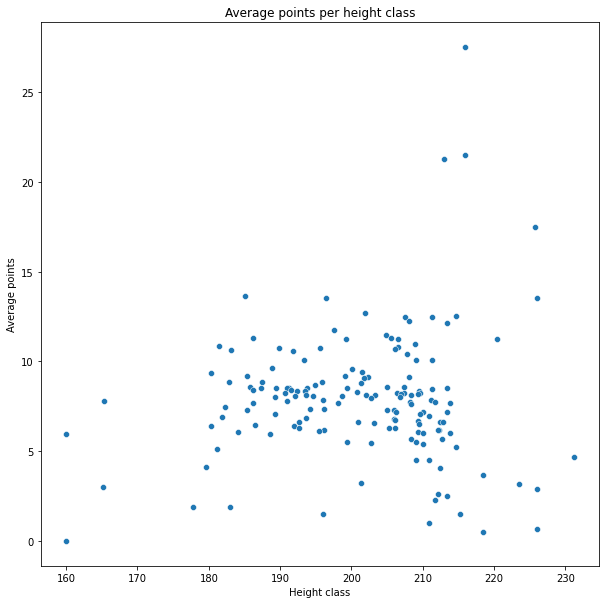

In [12]:
# 2) Does the player's height affect their performance? 
# Set figure size to by easier to read
plt.figure(figsize=(10,10));
# Gather data by heights of players to create auto generated height classes
player_heights = df.groupby(["player_height"]).mean().sort_values(by='pts', ascending=False).reset_index()
# Put data into a scatterplot and set title and x and y labels
player_heights_pts_plot = sns.scatterplot(x="player_height", y="pts", data=player_weights);
player_heights_pts_plot.set_title('Average points per height class');
player_heights_pts_plot.set(xlabel="Height class", ylabel = "Average points");

Does the player's height affect their performance?
* From the scatter plot shown we can see a correlation of height with points, players in the higher ranges of 210-230 cm seem to have the higher points per game, where most of the players seem to have heights between 190-210 cms. There does not seem to be a causation relationship but rather a correlation between average points and height. We chose a scatter plot as it was the best option to easily view this specific data for users as it showed differences in points better.


## **EXPLORATORY DATA ANALYSIS**

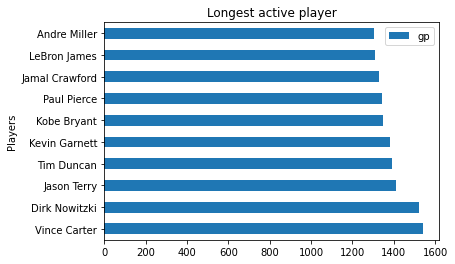

In [13]:
# 3) Who played the most games in the league? 
# Gather data by player names and sum their games played to find most games played
player_longest_career = df.groupby(["player_name"]).sum().sort_values(by='gp', ascending=False).reset_index()
# Put data into a horizontal bar plot and set title and x and y labels
player_longest_career[:10].plot(kind='barh', y='gp', x='player_name', title='Longest active player', xlabel='Players', ylabel='Games played');

3) Who has played the most games in the league? 
* To find the player who has played the most games in the league our approach was to group the dataset by player_name this would remove duplicate players, and in the process we also used the sum() function to add up the games played by the player. This process allowed us to find each unique player and their total games played during the 1996 - 2020 seasons. What we found was that Vince Carter, Dirk Nowitzki, and Jason Terry played the most games, with Vince Carter playing a little over 1500 games.
* Our initial approach was going to use the seasons played for each player, this was not viable as there were too many errors in the logic behind this approach such as; what if the player only played one game that season he would still be counted the same as a player who played all 82 games that same year.
* The challenge we faced for this task was to retrieve data that can be used in the sum() function, as originally the datasets values were a string type, in order to correct this during the data cleaning process we converted the data type of the values of games played to integers using the astype() function for dataframes. We chose a horizontal bar plot as it allowed us to show the games played easily.

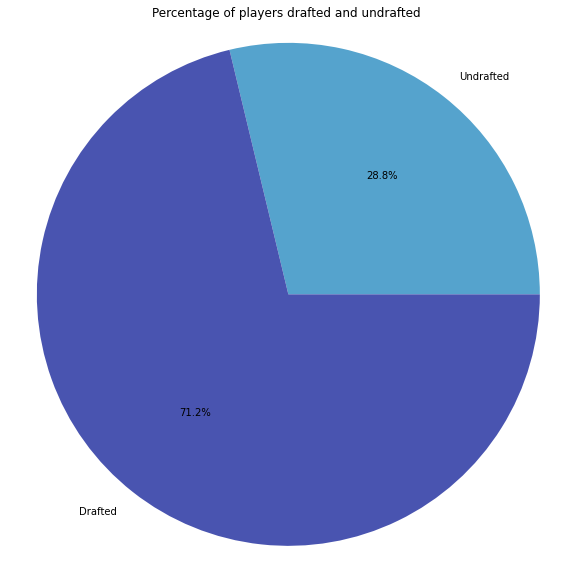

In [14]:
# 4) Calculate the percentage of players that were undrafted. 
#    * To see how many players were talented enough to directly sign with an NBA team instead of being drafted.
# Create list to store amount of drafted and undrafted players
draft_status_quantitiy = []
# Gather data by player draft year and group by player name to prevent multiple records of same player
draft_status_quantitiy.append(len(df[df['draft_year'] == 'Undrafted'].groupby(["player_name"])))
draft_status_quantitiy.append(len(df[df['draft_year'] != 'Undrafted'].groupby(["player_name"])))
# Put data into a pie plot, set title, x and y labels, change color of background, figure size, and set formating of data
my_labels = 'Undrafted','Drafted'
color = sns.color_palette("icefire")
fig = plt.figure(figsize=(10,10));
fig.patch.set_facecolor('white')
plt.pie(draft_status_quantitiy,labels=my_labels,autopct='%1.1f%%', colors= color);
plt.title('Percentage of players drafted and undrafted');
plt.axis('equal');
plt.show();

4) Calculate the percentage of players that were undrafted. 
    * To see how many players were talented enough to directly sign with an NBA team instead of being drafted.
* To calculate the percentage of players that were undrafted our approach was to use boolean indexing to find the number of players that were undrafted and the number of players that were drafted, and put these values in a list. This allowed us to easily provide the list as data to represent this as a pie graph. What we found was that 28.8% of players in the NBA were undrafted and 71.2% of players in the NBA were drafted. 
Our initial approach was going to use a bar graph to represent this data but we felt that a pie chart better illustrated the difference in the number of drafted and undrafted players in the NBA.
* The challenge we faced for this task was to make sure the data we retrieve was unique for each player and that we were not accounting for the same player multiple times as this would skew the results. In order to accomplish this we used the groupby() function to group by plaer_name after using boolean indexes to find undrafted and drafted players, which allowed us to only gather unique player names.


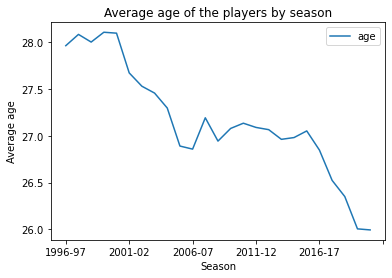

In [15]:
# 5) What is the average age of the players by season?
# Gather data by season and find mean of player age for each season
age_per_season = df.groupby(["season"]).mean().sort_values(by='season', ascending=True).reset_index()
# Put data into a line plot, set title, x and y labels
age_per_season.plot(kind='line', y='age', x='season', title='Average age of the players by season', xlabel='Season', ylabel='Average age');

5) What is the average age of the players by season?
* To calculate the average age of the players by season our approach was to group by the seasons and find the mean value of age for each season. This allowed us to easily plot the data as a line plot and found that the average age in 1996 was about 28 and in 2020 was about 26, a steady decline in average age per season. This may be due to the fact that many older players were retiring.
* Our initial approach was going to use a bar graph to represent this data but we felt that a line chart better illustrated the difference in the average age of the players by season in the NBA.
* The challenge we faced for this task was to retrieve data that can be used in the mean() function, as originally the datasets values were a string type, in order to correct this during the data cleaning process we converted the data type of the values of age to integers using the astype() function for dataframes We chose a line plot as it allowed us to show the change in age per season easily.


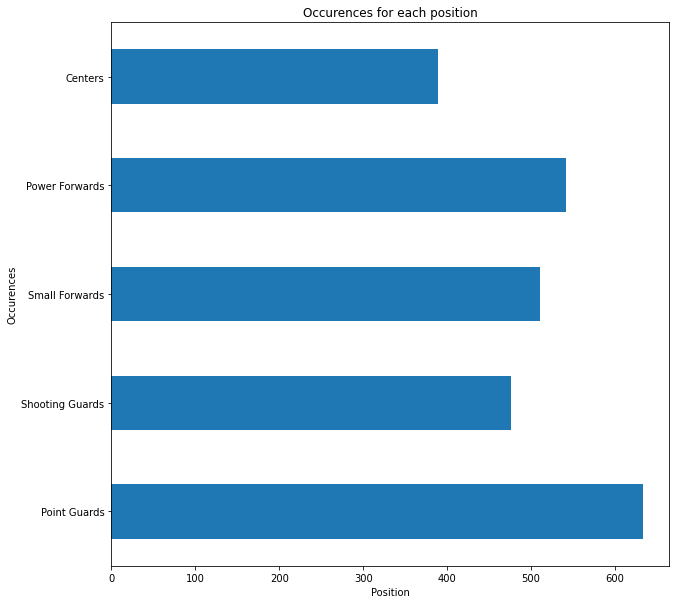

In [16]:
# 6) Determine the position of each player (since it's not provided in the dataset). 
#     * To find the average height per position. 
# Gather average height per position from online source to compare against
average_height_PG = 190.5
average_height_SG = 195.58
average_height_SF = 203.2
average_height_PF = 205.74
average_height_C = 210.82

# Create dict to store number of players for each position
positions_dict = {"Point Guards": 0, "Shooting Guards": 0, "Small Forwards": 0, "Power Forwards": 0, "Centers": 0}

# Create dict to store number of players for each position and group by player name to prevent multiple records of same player
positions_dict["Point Guards"] = len(df[df['player_height'] <= (average_height_PG + average_height_SG) / 2].groupby(["player_name"]))
positions_dict["Shooting Guards"] = len(df[(df['player_height'] <= (average_height_SF + average_height_SG) / 2) & (df['player_height'] > (average_height_PG + average_height_SG) / 2)].groupby(["player_name"]))
positions_dict["Small Forwards"] = len(df[(df['player_height'] <= (average_height_PF + average_height_SF) / 2) & (df['player_height'] > (average_height_SF + average_height_SG) / 2)].groupby(["player_name"]))
positions_dict["Power Forwards"] = len(df[(df['player_height'] <= (average_height_C + average_height_PF) / 2) & (df['player_height'] > (average_height_SF + average_height_PF) / 2)].groupby(["player_name"]))
positions_dict["Centers"] = len(df[df['player_height'] > (average_height_PF + average_height_C) / 2].groupby(["player_name"]))

# Convert data into pd series, and put data into a horizontal bar plot, set title, x and y labels
plt.figure(figsize=(10,10));
positions = pd.Series(positions_dict)
plt.title('Occurences for each position')
plt.xlabel('Position')
plt.ylabel('Occurences')
positions.plot.barh();

6) Determine the position of each player (since it's not provided in the dataset). 
    * To find the average height per position.
* To determine the position of each player our approach was to use boolean indexing to find players that were within the average height for a specified height and then group by player name to prevent players being accounted for multiple times. This allowed us to easily plot the data as a horizontal bar plot and found that the most played position was Point Guards with about 700 players, the lowest would be centers with a little over 400 players.
* Given that this data was not provided for us the challenge we faced was to seek out the average height for using this reference (https://www.thehoopsgeek.com/average-nba-height/) there is a margin of error here that we are unable to calculate with the given data.

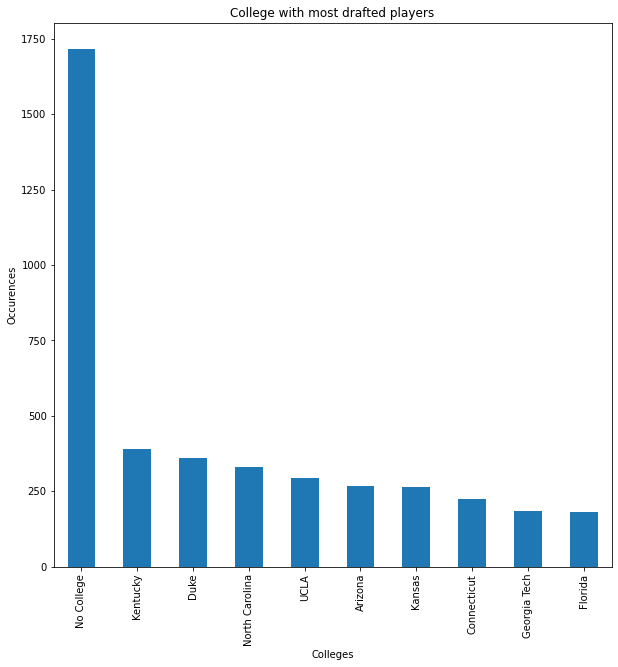

In [17]:
# 7) Find the top 5 colleges. 
#     * To see which colleges most players played for before coming to the NBA.
# Gather college occurences by using value_counts() to count for unique player to prevent multiple records of same player
# Put data into a bar plot, set title, x and y labels, only top 10 as there is alot of schools
plt.figure(figsize=(10,10));
plt.title('College with most drafted players')
plt.xlabel('Colleges')
plt.ylabel('Occurences')
df["college"].value_counts()[:10].plot.bar();

7) Find the top 5 colleges. 
    * To see which colleges most players played for before coming to the NBA.
* To find the top 5 colleges where players attended before being drafted our approach was to use value counts to find unique occurrences of college names. This allowed us to easily plot the data as a bar plot and found that most players did not go to college, even so the top 5 colleges were; Kentucky, Duke, North Carolina, UCLA, and Arizona.
* The challenge we faced for this task was to retrieve each player's college once, but were unable to achieve this as value counts only checks if data for each row and will account for the same player multiple times. We chose a line plot as it allowed us to show the change in age per season easily.


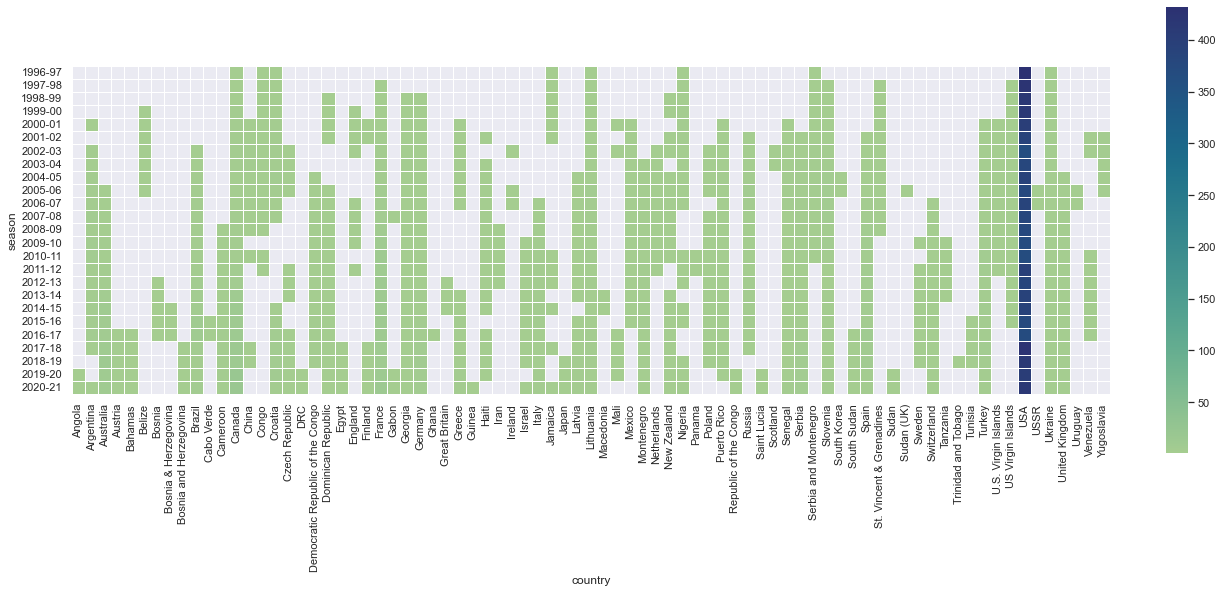

In [18]:
# 8) Display the countries where players are form for each season. 
#     * To see which countries players are coming from the most.
# Gather country occurences per season by using groupby to count for each country in each season
# Put data into a heat map, and set visually appealing colour, set figure size to make it easier to view
player_countries = df.groupby(['season', 'country']).size().unstack()
sns.set_theme()
plt.figure(figsize=(20,20))
player_countries_heat_map = sns.heatmap(player_countries, square=True, cbar_kws={'fraction' : 0.02}, linewidth=0.5, linewidths=.5, cmap="crest")

8) Display the countries where players are from for each season. 
    * To see which countries players are coming from the most.
* To display the countries where players are from for each season our approach was to group by the seasons and country to find the countries for each season This allowed us to easily plot the data as a heat map and found that the most common country where players are from is the USA.
Our initial approach was going to use a bar graph to represent this data but we felt that a heat map would be better at illustrating the difference in the countries of each player by season in the NBA.
* The challenge we faced for this task was to retrieve data that can be used in the heat map, as originally the datasets values were a string type, in order to receive usable data for the heat map we had to call teh size() and unstack() method to get the values we needed for the heat map. 


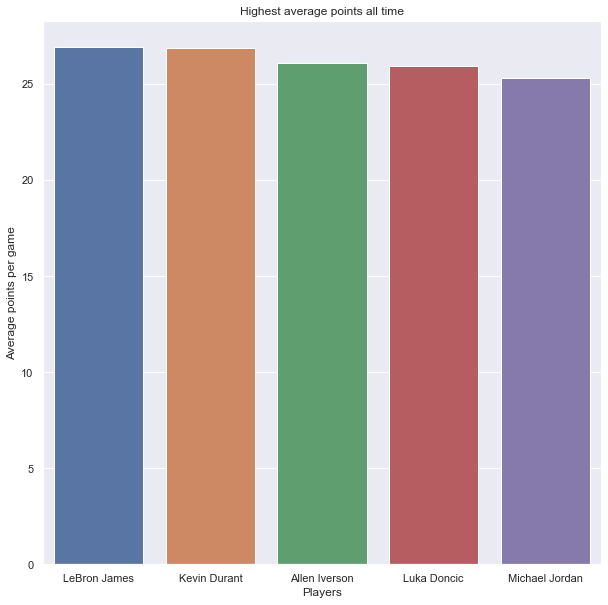

In [19]:
# 9) Find the player with the most points, rebounds, assists, net rating, and shooting percentage respectively, of all-time. 
# Gather average data by using group by player name and the mean() function
highest_player_stats = df.groupby(["player_name"]).mean()
# Put data into a bar plot, set title, x and y labels, only top 5 players, sorted by points
plt.figure(figsize=(10,10));
highest_pts_plot = sns.barplot(x="player_name", y="pts", data=highest_player_stats.sort_values(by='pts', ascending=False).reset_index()[:5]);
highest_pts_plot.set_title('Highest average points all time');
highest_pts_plot.set(xlabel="Players", ylabel = "Average points per game");

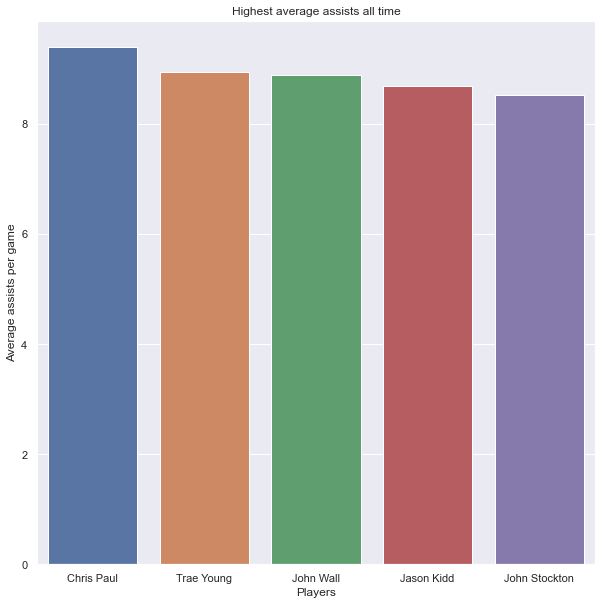

In [20]:
# 9) continued... 
# Put data into a bar plot, set title, x and y labels, only top 5 players, sorted by assists
plt.figure(figsize=(10,10));
highest_ast_plot = sns.barplot(x="player_name", y="ast", data=highest_player_stats.sort_values(by='ast', ascending=False).reset_index()[:5]);
highest_ast_plot.set_title('Highest average assists all time');
highest_ast_plot.set(xlabel="Players", ylabel = "Average assists per game");

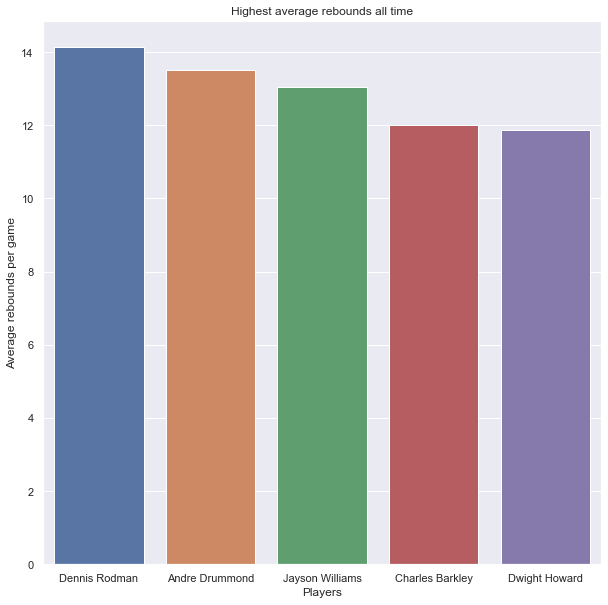

In [21]:
# 9) continued... 
# Put data into a bar plot, set title, x and y labels, only top 5 players, sorted by rebounds
plt.figure(figsize=(10,10));
highest_reb_plot = sns.barplot(x="player_name", y="reb", data=highest_player_stats.sort_values(by='reb', ascending=False).reset_index()[:5]);
highest_reb_plot.set_title('Highest average rebounds all time');
highest_reb_plot.set(xlabel="Players", ylabel = "Average rebounds per game");

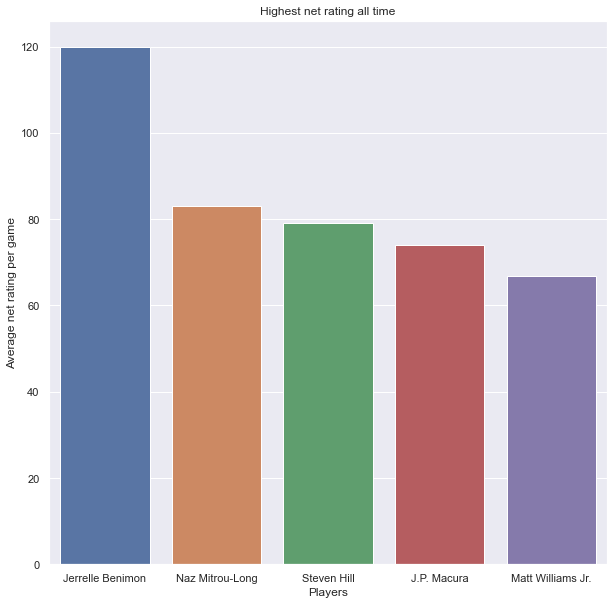

In [22]:
# 9) continued... 
# Put data into a bar plot, set title, x and y labels, only top 5 players, sorted by net rating
plt.figure(figsize=(10,10));
highest_pts_plot = sns.barplot(x="player_name", y="net_rating", data=highest_player_stats.sort_values(by='net_rating', ascending=False).reset_index()[:5]);
highest_pts_plot.set_title('Highest net rating all time');
highest_pts_plot.set(xlabel="Players", ylabel = "Average net rating per game");

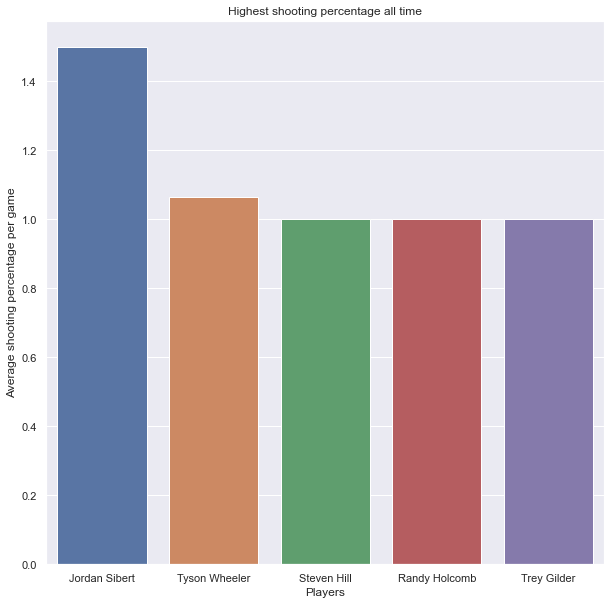

In [23]:
# 9) continued... 
# Put data into a bar plot, set title, x and y labels, only top 5 players, sorted by shooting percentage
plt.figure(figsize=(10,10));
highest_pts_plot = sns.barplot(x="player_name", y="ts_pct", data=highest_player_stats.sort_values(by='ts_pct', ascending=False).reset_index()[:5]);
highest_pts_plot.set_title('Highest shooting percentage all time');
highest_pts_plot.set(xlabel="Players", ylabel = "Average shooting percentage per game");

9) Find the player with the highest average points, rebounds, assists, net rating, and team shooting percentage respectively, of all-time.
* To find the player with the most points, rebounds, assists, net rating, and shooting percentage respectively, of all-time our approach was to group by the player name and find the mean value of points, rebounds, assists, net rating, and shooting percentage. This allowed us to easily plot the data as a bar plot and found that the highest average points of all time was Lebron James with about 27 PPG (points per game), the highest average assists of all time was Chris Paul with about 9.5 APG (assists per game), the highest average rebounds of all time was Dennis Rodman with about 14 RPG (rebounds per game), the highest average net rating of all time was Jerrelle Benimon with about 120 points per season, the highest average team shooting percentage of all time was Jordan Sibert with about 1.5%.
* The challenge we faced for this task was to retrieve data that can be used in the mean() function, as originally the datasets values were a string type, in order to correct this during the data cleaning process we converted the data type of the values of age to integers using the astype() function for dataframes. We chose a bar plot as it allowed us to show the top 5 in each category easily.

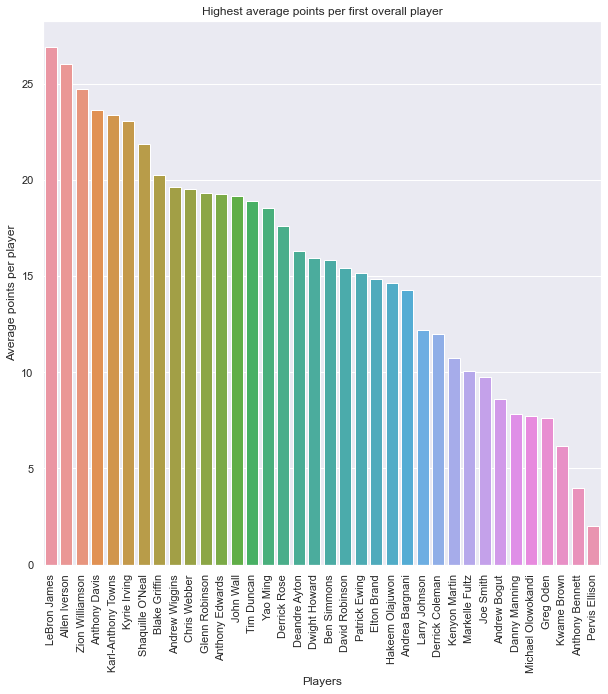

In [34]:
# 10) Compare first-round, number-one player picks from each draft year.
#     * To find out whether there were any NBA busts from the draft. 
# Gather average data for first overall pick players by using boolean indexes ot fidn draft number and then group by player name and the mean() function
first_overalls = df[df["draft_number"] == '1'].groupby(["player_name"]).mean().round(decimals=2)
# Put data into a bar plot, set title, x and y labels, only top 5 players, sorted by points
plt.figure(figsize=(10,10));
first_overall_highest_pts_plot = sns.barplot(x="player_name", y="pts", data=first_overalls.sort_values(by='pts', ascending=False).reset_index());
first_overall_highest_pts_plot.set_title('Highest average points per first overall player');
first_overall_highest_pts_plot.set(xlabel="Players", ylabel = "Average points per player");
first_overall_highest_pts_plot.set_xticklabels(first_overall_highest_pts_plot.get_xticklabels(), rotation=90);

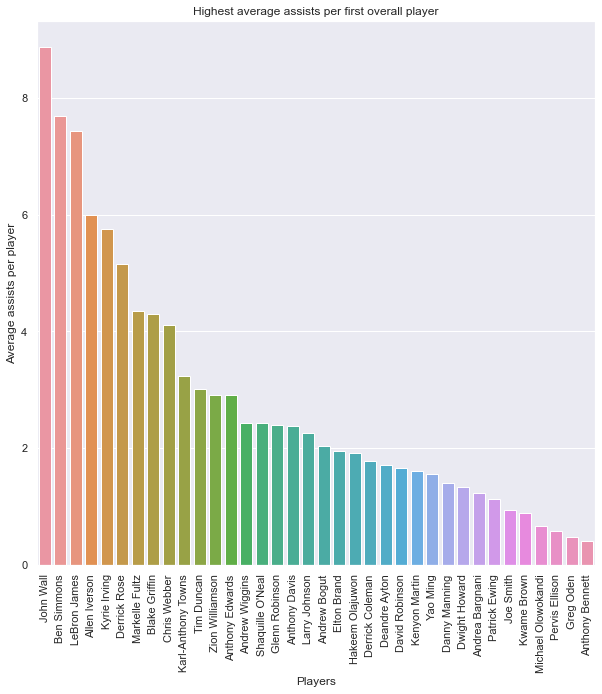

In [25]:
# 10) continued... 
# Put data into a bar plot, set title, x and y labels, only top 5 players, sorted by assists
plt.figure(figsize=(10,10));
first_overall_highest_ast_plot = sns.barplot(x="player_name", y="ast", data=first_overalls.sort_values(by='ast', ascending=False).reset_index());
first_overall_highest_ast_plot.set_title('Highest average assists per first overall player');
first_overall_highest_ast_plot.set(xlabel="Players", ylabel = "Average assists per player");
first_overall_highest_ast_plot.set_xticklabels(first_overall_highest_ast_plot.get_xticklabels(), rotation=90);

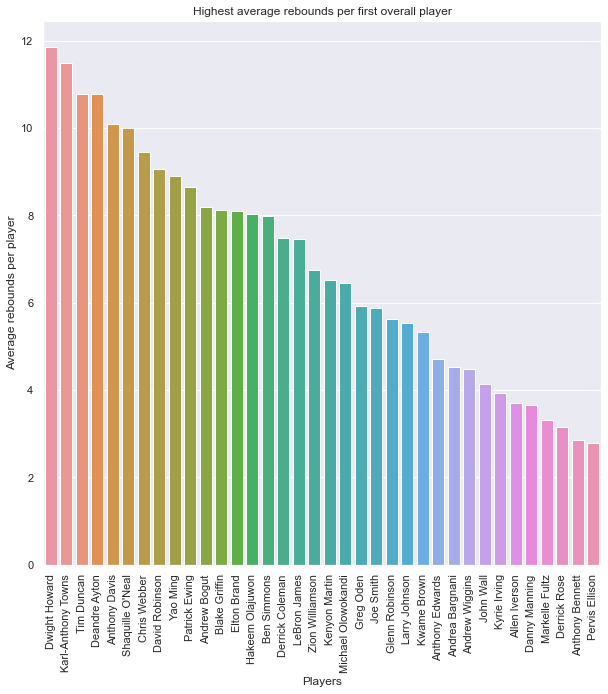

In [26]:
# 10) continued... 
# Put data into a bar plot, set title, x and y labels, only top 5 players, sorted by rebounds
plt.figure(figsize=(10,10));
first_overall_highest_reb_plot = sns.barplot(x="player_name", y="reb", data=first_overalls.sort_values(by='reb', ascending=False).reset_index());
first_overall_highest_reb_plot.set_title('Highest average rebounds per first overall player');
first_overall_highest_reb_plot.set(xlabel="Players", ylabel = "Average rebounds per player");
first_overall_highest_reb_plot.set_xticklabels(first_overall_highest_reb_plot.get_xticklabels(), rotation=90);

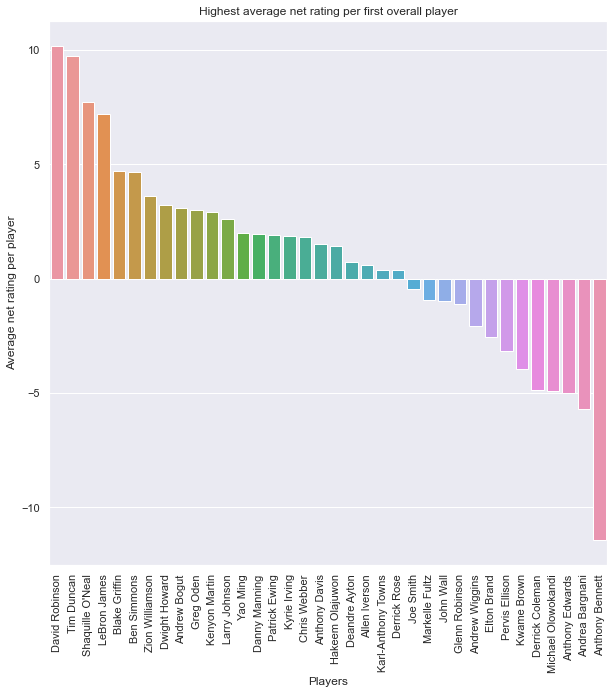

In [27]:
# 10) continued... 
# Put data into a bar plot, set title, x and y labels, only top 5 players, sorted by net rating
plt.figure(figsize=(10,10));
first_overall_highest_reb_plot = sns.barplot(x="player_name", y="net_rating", data=first_overalls.sort_values(by='net_rating', ascending=False).reset_index());
first_overall_highest_reb_plot.set_title('Highest average net rating per first overall player');
first_overall_highest_reb_plot.set(xlabel="Players", ylabel = "Average net rating per player");
first_overall_highest_reb_plot.set_xticklabels(first_overall_highest_reb_plot.get_xticklabels(), rotation=90);

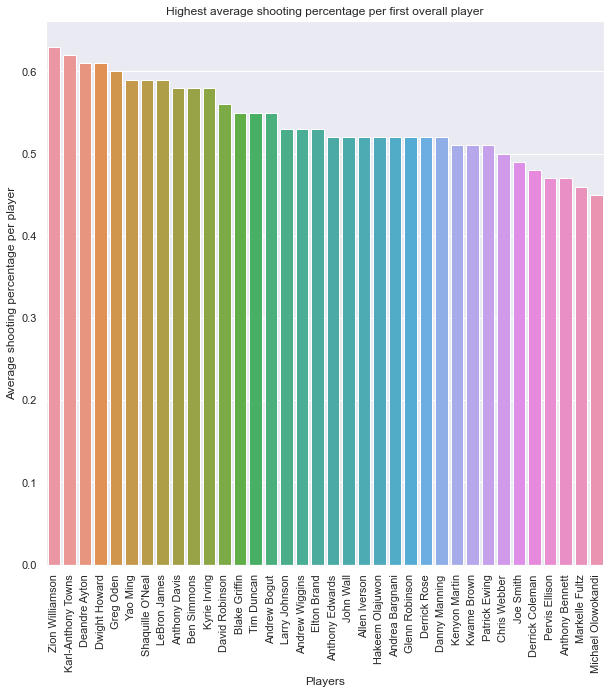

In [28]:
# 10) continued... 
# Put data into a bar plot, set title, x and y labels, only top 5 players, sorted by shooting percentage
plt.figure(figsize=(10,10));
first_overall_highest_reb_plot = sns.barplot(x="player_name", y="ts_pct", data=first_overalls.sort_values(by='ts_pct', ascending=False).reset_index());
first_overall_highest_reb_plot.set_title('Highest average shooting percentage per first overall player');
first_overall_highest_reb_plot.set(xlabel="Players", ylabel = "Average shooting percentage per player");
first_overall_highest_reb_plot.set_xticklabels(first_overall_highest_reb_plot.get_xticklabels(), rotation=90);

10) Compare first-round, number-one player picks from each draft year.
    * To find out whether there were any NBA busts from the draft. 
* To compare first-round, number-one player picks from each draft year with the most points, rebounds, assists, net rating, and shooting percentage respectively, our approach was to use boolean indexing to filter out for players whose draft number is 1 and then group by the player name and find the mean value of points, rebounds, assists, net rating, and shooting percentage. This allowed us to easily plot the data as a bar plot and found that the highest average points of first overall players was Lebron James with about 27 PPG (points per game), the highest average assists of first overall players was John Wall with about 9 APG (assists per game), the highest average rebounds of first overall players was Dwight Howard with a little under 12 RPG (rebounds per game, the highest average net rating of first overall players was David Robinson with about 10 points per game, the highest average team shooting percentage of first overall players was Zion Williamson with about 0.7%.
* The challenge we faced for this task was to filter out players who were first overall draft picks and to retrieve data that can be used in the mean() function, as originally the datasets values were a string type, in order to correct this during the data cleaning process we converted the data type of the values of age to integers using the astype() function for dataframes. This data will also be useful later on for potential data science applications, as we will see in one of our confusion matrices.


In [33]:
# 11) All-Star players? (All-Star player defined as pts: 20+, reb: 7+, ast: 7+). 
# Gather average data for per player name and apply all_star_checker() function to see if they are all stars
players_score = df.groupby(["player_name"]).mean().round(decimals=2)
def all_star_checker(player):
    if (player['pts'] >= 20) | (player['ast'] >= 7) | (player['reb'] >= 7) | (player['net_rating'] >= 25) | (player['oreb_pct'] >= 0.50) | (player['dreb_pct'] >= 0.50) & (player['ts_pct'] >= 0.5):
        return 1
    else:
        return 0

players_score["All_Star"] = players_score.apply(all_star_checker, axis=1)
players_score[players_score['All_Star'] == 1]
players_score.drop(columns='age', inplace=False).sort_values(by='pts', ascending=False)[:10]

,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,ts_pct,All_Star
player_name,,,,,,,,,,,
LeBron James,203.48,112.39,72.78,26.93,7.46,7.43,7.21,0.04,0.18,0.59,1
Kevin Durant,205.94,106.07,68.00,26.88,7.08,4.24,6.34,0.02,0.18,0.62,1
Allen Iverson,182.88,75.81,65.29,26.06,3.69,6.00,0.60,0.02,0.08,0.52,1
Luka Doncic,200.66,102.51,66.33,25.90,8.40,7.80,2.03,0.03,0.21,0.57,1
Michael Jordan,198.12,97.98,76.50,25.30,5.88,4.20,5.40,0.04,0.15,0.51,1
James Harden,195.58,99.98,73.08,25.09,5.53,6.65,5.83,0.02,0.14,0.61,1
Damian Lillard,189.94,88.45,75.78,24.92,4.19,6.67,3.29,0.02,0.10,0.58,1
Zion Williamson,199.39,128.82,42.50,24.75,6.75,2.90,3.60,0.09,0.12,0.63,1
Trae Young,186.27,81.65,68.00,24.67,3.97,8.93,-2.00,0.02,0.10,0.57,1


11) All-Star players? (All-Star player defined as pts: 25+, reb: 7+, ast: 7+).
* To find All-Star players, our approach was to group by the player name and find the mean value of points, rebounds, assists, net rating, and shooting percentage. Then we can use an apply function to give each player a value based on their scoring. This allowed us to easily set up data that can be used for the data science portion of our project. 
* The challenge we faced for this task was to filter out players who were All-Stars by assigning them valers based on their scoring. We were able to use data that we gathered from question 9.
* The remainder of this question leads into oru potential data science applications and the use of these datasets in our confusion matrices.


## **POTENTIAL DATA SCIENCE**

In [ ]:
# For Data Science Application
import sys
!{sys.executable} -m pip install sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

In [ ]:
print(players_score.All_Star.value_counts())

0    2171
1     162
Name: All_Star, dtype: int64


In [ ]:
y = players_score['All_Star']
y

player_name
A.C. Green            0
A.J. Bramlett         0
A.J. Guyton           0
AJ Hammons            0
AJ Price              0
                     ..
Zion Williamson       1
Zoran Dragic          0
Zoran Planinic        0
Zydrunas Ilgauskas    1
Zylan Cheatham        0
Name: All_Star, Length: 2333, dtype: int64

In [ ]:
# Split data into training and testing with a 25% split
X_train, X_test, y_train, y_test = train_test_split(players_score[['pts', 'ast', 'reb', 'oreb_pct', 'dreb_pct', 'ts_pct', 'net_rating']], y, test_size = 0.25, random_state = 0)

In [ ]:
# Apply Pipeline useing standardscaler and logisticregression methods to classify numeric data, and then fit the data into the model and feed it through our predictor
pip_prdict = Pipeline(steps=[('standardscaler', StandardScaler()), ('logisticregression', LogisticRegression())])
pip_prdict.fit(X_train, y_train)
y_pred = pip_prdict.predict(X_test)
# Returns accuracy scores
print(accuracy_score(pip_prdict.predict(X_test), y_test))

0.9708904109589042


              precision    recall  f1-score   support

    All-Star       0.98      0.99      0.98       540
Not All-Star       0.85      0.75      0.80        44

    accuracy                           0.97       584
   macro avg       0.91      0.87      0.89       584
weighted avg       0.97      0.97      0.97       584



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


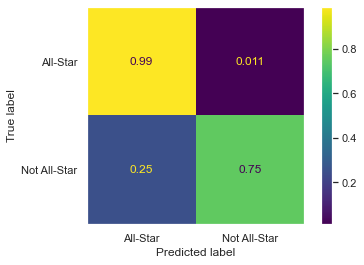

In [ ]:
# Print classification report and apply confusion matrix on our model
print(classification_report(y_test, y_pred, target_names = ['All-Star', 'Not All-Star']))
plot_confusion_matrix(pip_prdict, X_test, y_test, display_labels = ['All-Star', 'Not All-Star'], normalize = 'true');
plt.grid(False);

### Predicting NBA All-Star Players: 
Our model’s results were based on using 25% (584 players out of 2333 players, 162 players were All-Stars, and 2171 players weren't All-Stars, total: 2333) of unique players. Based on the results of our model, we see that our All-Star class has a precision 98% and our Not All-Star class has a precision of 85% which shows that our model is fairly precise when it comes to predicting true All-Stars as its precision is 98%, and is also fairly decent when predicting true Not All-Stars as its precision is 85%.
Likewise, the value of recall for our All-Star class is 99% and for our Not All-Star class is 75% which shows that our model can prevent mistakes when predicting true All-Stars but has mistakes when predicting Not All-Star as All-Star, we can view this false positive as our predictor indicating that this player has the potential to become and ALL-Stars. The accuracy of the model on the data set is 97%. Since precision for All-Star was very high and recall for Not All-Star was also high, using an f1-score would be ideal to accurately measure our models performance. Based on the f1-score of our model, 98% of all All-Star were predicted correctly and likewise 80% of Not All-Stars. This leads us to believe that 20% of players that are not currently All-Stars have the underlying numbers to become an All-Star. 
The mean average of precision was 91% and the mean average of recall was 87%. The weighted averages represent the sum of the scores of all classes after multiplying their respective class proportions.


In [ ]:
# Function to see if first overall players are meeting potential or not
def met_potential_checker(player):
    if (player['pts'] >= 20) | (player['ast'] >= 7) | (player['reb'] >= 7) & (player['net_rating'] >= 0) | (player['oreb_pct'] >= 0.50) | (player['dreb_pct'] >= 0.50) & (player['ts_pct'] >= 0.5):
        return 1
    else:
        return 0
first_overalls["Met_Potential"] = first_overalls.apply(met_potential_checker, axis=1)

In [ ]:
print(first_overalls.Met_Potential.value_counts())

1    19
0    17
Name: Met_Potential, dtype: int64


In [ ]:
y = first_overalls['Met_Potential']
y

player_name
Allen Iverson         1
Andrea Bargnani       0
Andrew Bogut          1
Andrew Wiggins        0
Anthony Bennett       0
Anthony Davis         1
Anthony Edwards       0
Ben Simmons           1
Blake Griffin         1
Chris Webber          1
Danny Manning         0
David Robinson        1
Deandre Ayton         1
Derrick Coleman       0
Derrick Rose          0
Dwight Howard         1
Elton Brand           0
Glenn Robinson        0
Greg Oden             0
Hakeem Olajuwon       1
Joe Smith             0
John Wall             1
Karl-Anthony Towns    1
Kenyon Martin         0
Kwame Brown           0
Kyrie Irving          1
Larry Johnson         0
LeBron James          1
Markelle Fultz        0
Michael Olowokandi    0
Patrick Ewing         1
Pervis Ellison        0
Shaquille O'Neal      1
Tim Duncan            1
Yao Ming              1
Zion Williamson       1
Name: Met_Potential, dtype: int64

In [ ]:
# Split data into training and testing with a 25% split
X_train, X_test, y_train, y_test = train_test_split(first_overalls[['pts', 'ast', 'reb', 'net_rating']], y, test_size = 0.25, random_state = 0)

In [ ]:
# Apply Pipeline useing standardscaler and logisticregression methods to classify numeric data, and then fit the data into the model and feed it through our predictor
pip_prdict = Pipeline(steps=[('standardscaler', StandardScaler()), ('logisticregression', LogisticRegression())])
pip_prdict.fit(X_train, y_train)
y_pred = pip_prdict.predict(X_test)
# Returns accuracy scores
print(accuracy_score(pip_prdict.predict(X_test), y_test))

0.8888888888888888


              precision    recall  f1-score   support

         Gem       0.80      1.00      0.89         4
        Bust       1.00      0.80      0.89         5

    accuracy                           0.89         9
   macro avg       0.90      0.90      0.89         9
weighted avg       0.91      0.89      0.89         9



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


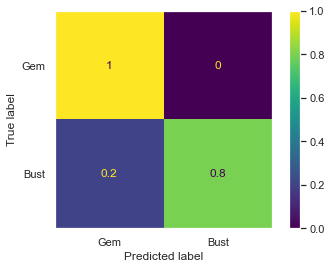

In [ ]:
# Print classification report and apply confusion matrix on our model
print(classification_report(y_test, y_pred, target_names = ['Gem', 'Bust']))
plot_confusion_matrix(pip_prdict, X_test, y_test, display_labels = ['Gem', 'Bust'], normalize = 'true');
plt.grid(False);

### Predicting First Overall Draft Pick Performance: 
Our model’s results were based on using 25% (9 players out of 36 players, 19 players met their potential, and 17 players didn’t, total: 36 first overall players). Based on the results of our model, we see that our Gem class (meaning they have met their potential) has a precision 80% and our Bust class (meaning players who have not reached their potential) has a precision of 100% which shows that our model is fairly precise when it comes to predicting true Busts as its precision is 100%, and is also fairly decent when predicting true Gems as its precision is 80%.
Likewise, the value of recall for our Gem class is 100% and for our Bust class is 80% which shows that our model can prevent mistakes when predicting true Gems but has mistakes when predicting Busts as Gems, we can view this false positive as our predictor indicating that this player has the potential to meet his potential and become a Gem. The accuracy of the model on the data set is 89%. Since precision for Gem was high and recall for Bust was also high, using an f1-score would be ideal to accurately measure our models performance. Based on the f1-score of our model, 89% of all Gems were predicted correctly and likewise 89% of Busts. This leads us to believe that 11% of players that are not currently Gems have the underlying numbers to become a Gem. 
The mean average of precision was 90% and the mean average of recall was also 90%. The weighted averages represent the sum of the scores of all classes after multiplying their respective class proportions.


In [ ]:
# Function to see if players are able to make enough impact on games to continue to play in the NBA
def NBA_player_checker(player):
    if (player['pts'] >= 5) | (player['ast'] >= 2) | (player['reb'] >= 2) & (player['net_rating'] >= 0) | (player['oreb_pct'] >= 0.1) | (player['dreb_pct'] >= 0.1) & (player['ts_pct'] >= 0.25):
        return 1
    else:
        return 0

players_score["NBA_Player"] = players_score.apply(NBA_player_checker, axis=1)

In [ ]:
print(players_score.NBA_Player.value_counts())

1    2005
0     328
Name: NBA_Player, dtype: int64


In [ ]:
y = players_score['NBA_Player']
y

player_name
A.C. Green            1
A.J. Bramlett         1
A.J. Guyton           0
AJ Hammons            1
AJ Price              1
                     ..
Zion Williamson       1
Zoran Dragic          0
Zoran Planinic        1
Zydrunas Ilgauskas    1
Zylan Cheatham        1
Name: NBA_Player, Length: 2333, dtype: int64

In [ ]:
# Split data into training and testing with a 25% split
X_train, X_test, y_train, y_test = train_test_split(players_score[['pts', 'ast', 'reb', 'net_rating', 'ts_pct', 'oreb_pct', 'dreb_pct']], y, test_size = 0.25, random_state = 0)

In [ ]:
# Apply Pipeline useing standardscaler and logisticregression methods to classify numeric data, and then fit the data into the model and feed it through our predictor
pip_prdict = Pipeline(steps=[('standardscaler', StandardScaler()), ('logisticregression', LogisticRegression())])
pip_prdict.fit(X_train, y_train)
y_pred = pip_prdict.predict(X_test)
# Returns accuracy scores
print(accuracy_score(pip_prdict.predict(X_test), y_test))

0.9212328767123288


                precision    recall  f1-score   support

    NBA_Player       0.73      0.66      0.69        79
Not NBA_Player       0.95      0.96      0.95       505

      accuracy                           0.92       584
     macro avg       0.84      0.81      0.82       584
  weighted avg       0.92      0.92      0.92       584



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


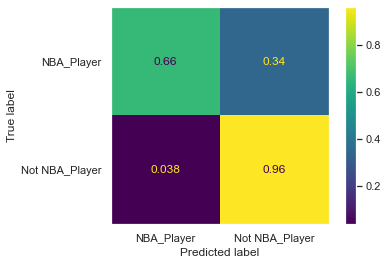

In [ ]:
# Print classification report and apply confusion matrix on our model
print(classification_report(y_test, y_pred, target_names = ['NBA_Player', 'Not NBA_Player']))
plot_confusion_matrix(pip_prdict, X_test, y_test, display_labels = ['NBA_Player', 'Not NBA_Player'], normalize = 'true');
plt.grid(False);

### Predicting if an NBA player Deserves to be in the League: 
Our model’s results were based on using 25% (584 players out of 2333 players, 2005 players were capable of continuing to play in the NBA, and 328 players weren't capable of continuing to play in the NBA, total: 2333) of unique players. Based on the results of our model, we see that our NBA_Player class (meaning capable of continuing to play in the NBA) has a precision 73% and our Not NBA_Player class (meaning not capable of continuing to play in the NBA) has a precision of 95% which shows that our model is fairly precise when it comes to predicting true Not NBA_Player as its precision is 95%, but has a fairly big error margin for predicting true NBA_Player as its precision is 73%.
Likewise, the value of recall for our NBA_Player Star class is 66% and for our Not NBA_Player class is 96% which shows that our model can prevent mistakes when predicting true Not NBA_Players but has mistakes when predicting NBA_Players, we can view this false negative as our predictor indicating that this player has underlying numbers that he cannot sustain to play in the NBA. The accuracy of the model on the data set is 92%. Since recall for Not NBA_Player was very high, using an f1-score would be ideal to accurately measure our models performance. Based on the f1-score of our model, 69% of all NBA_Players were predicted correctly and likewise 95% of Not NBA_Player. This leads us to believe that 34% of players do not have the underlying numbers to continue to be capable of playing in the NBA.
The mean average of precision was 91% and the mean average of recall was 87%. The weighted averages represent the sum of the scores of all classes after multiplying their respective class proportions.


Another potential data science application is predicting MVP players, we were unable to accomplish this due to our lack of knowledge with machine learning and given the data that we had.

## **CONCLUSION**
 
As a group, we learned many things from the “NBA Players” dataset. We believe that our findings and analysis of this dataset can be extended for the use of coaching and development staff in the NBA league. Our research can be used to determine if factors such as height and weight affect the player's performance. The NBA teams’ training and development staff can help improve particular players using this research. Furthermore, the NBA teams can also see statistics of which college or country the best players come from, so they can draft the best of the best for their team. 

### Limitations: 
We took the feedback from our proposal regarding the machine learning application of predicting the NBA’s most valuable player into critical consideration. However, we did not have enough necessary columns representing players’ performance in games. Attributes such as, steals, blocks, field goal percentage, 3 point percentage, free throw percentage and games won are very essential when it comes to predicting the most valuable player in the game. Nonetheless, with the columns of points, rebounds, assists, net rating,  oreb_pct, dreb_pct, usg_pct, ts_pct, and ast_pct, our group was still able to predict and analyze the NBA’s all-star caliber players. 

### Lessons Learned: 
Many lessons were learned in this course and also in this final project. With the “NBA Players” dataset, our group’s biggest downfall was figuring out how to build a successful confusion matrix for machine learning applications with this dataset. We did not see potential for comparing existing columns within the dataset, thus, we decided to generate our own variables (ex. All-star player) to build important connections, correlations and findings using the confusion matrix, in order to conclude valuable potential data science applications. 


## **REFERENCES**

* Alan, Andy, Keith, &amp; Tom. (2021, March 12). The average height of NBA players - from point guards to centers. The Hoops Geek. Retrieved December 5, 2021, from https://www.thehoopsgeek.com/average-nba-height/. 
* Average measurements by position. DraftExpress. (n.d.). Retrieved December 5, 2021, from http://www.draftexpress.com/average-measurements-by-position/all/NBA+Draft+Combine/all/all/. 
* Cirtautas, J. (2021, August 2). NBA players. Kaggle. Retrieved December 5, 2021, from https://www.kaggle.com/justinas/nba-players-data. 
* Freire, D. (2021, March 28). Predicting 2020–21 NBA's most valuable player using machine learning. Medium. Retrieved December 5, 2021, from https://towardsdatascience.com/predicting-2020-21-nbas-most-valuable-player-using-machine-learning-24aaa869a740. 

## **ACKNOWLEDGEMENTS**
*This project was submitted as the final course project for CSCI 2000U “Scientific Data Analysis” during Fall 2021. The authors certify that the work in this repository is original and that all appropriate resources are rightfully cited.* 